# Ecommerce Sales Project

## Buisness Problems~

#Objectives

1)Identify the sales trends with respect to categories monthly.

2)Identify best-selling items and high-revenue periods [weekly].

3)Analyze payment behavior with sales.

4)Which location yeilds more sales?

5)Price, Sales Correlation & Quantity, Sales Correlation.

#Importing Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Loading Dataset

In [2]:
df = pd.read_csv("C:/Users/chari/OneDrive/Desktop/MY WORK/Ecommerce-Sales/ecommerce_24-25_sales.csv")

In [3]:
df

,CustomerID,OrderDate,ProductID,Category,Quantity,Price,Sales,City,PaymentType
0,C187,18-Sep-25,P409,Beauty,2,4154.0,8308.0,Pune,Credit Card
1,C174,18-Apr-25,P826,Beauty,4,2151.0,8604.0,Kolkata,Debit Card
2,C015,27-Dec-24,P659,Sports,5,830.0,4150.0,Hyderabad,Net Banking
3,C174,15-Oct-24,P806,Beauty,2,1367.0,2734.0,Pune,Net Banking
4,C120,23-Oct-24,P535,Sports,3,1901.0,5703.0,Kolkata,UPI
...,...,...,...,...,...,...,...,...,...
995,C054,15-Jun-25,P212,Furniture,4,2216.0,8864.0,Chennai,Cash
996,C172,20-Mar-25,P844,Clothing,4,1979.0,7916.0,Bengaluru,Debit Card
997,C155,13-Nov-24,P470,Beauty,5,1443.0,7215.0,Pune,UPI
998,C135,11-May-25,P230,Electronics,3,1525.0,4575.0,Delhi,Credit Card


#Overview of my Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   1000 non-null   object 
 1   OrderDate    1000 non-null   object 
 2   ProductID    1000 non-null   object 
 3   Category     1000 non-null   object 
 4   Quantity     1000 non-null   int64  
 5   Price        1000 non-null   float64
 6   Sales        1000 non-null   float64
 7   City         1000 non-null   object 
 8   PaymentType  1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


#Data Clean Up

In [5]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.info()

C:\Users\chari\AppData\Local\Temp\ipykernel_17816\1519867300.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   1000 non-null   object        
 1   OrderDate    1000 non-null   datetime64[ns]
 2   ProductID    1000 non-null   object        
 3   Category     1000 non-null   object        
 4   Quantity     1000 non-null   int64         
 5   Price        1000 non-null   float64       
 6   Sales        1000 non-null   float64       
 7   City         1000 non-null   object        
 8   PaymentType  1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 70.4+ KB


In [6]:
df_DA = df

## 1)Identify the sales trends with respect to categories monthly.

In [7]:
df_DA

,CustomerID,OrderDate,ProductID,Category,Quantity,Price,Sales,City,PaymentType
0,C187,2025-09-18,P409,Beauty,2,4154.0,8308.0,Pune,Credit Card
1,C174,2025-04-18,P826,Beauty,4,2151.0,8604.0,Kolkata,Debit Card
2,C015,2024-12-27,P659,Sports,5,830.0,4150.0,Hyderabad,Net Banking
3,C174,2024-10-15,P806,Beauty,2,1367.0,2734.0,Pune,Net Banking
4,C120,2024-10-23,P535,Sports,3,1901.0,5703.0,Kolkata,UPI
...,...,...,...,...,...,...,...,...,...
995,C054,2025-06-15,P212,Furniture,4,2216.0,8864.0,Chennai,Cash
996,C172,2025-03-20,P844,Clothing,4,1979.0,7916.0,Bengaluru,Debit Card
997,C155,2024-11-13,P470,Beauty,5,1443.0,7215.0,Pune,UPI
998,C135,2025-05-11,P230,Electronics,3,1525.0,4575.0,Delhi,Credit Card


In [8]:
df_DA['OrderMonth'] = df_DA['OrderDate'].dt.strftime('%b')
df_DA['OrderMonthNum'] = df_DA['OrderDate'].dt.month
df_DA['OrderYear'] = df_DA['OrderDate'].dt.year
df_DA['OrderDay'] = df_DA['OrderDate'].dt.day_name()
df_DA['OrderWeekNum'] = df_DA['OrderDate'].dt.isocalendar().week
df_DA['OrderDayNum'] = df_DA['OrderDate'].dt.dayofweek + 1
df_DA

,CustomerID,OrderDate,ProductID,Category,Quantity,Price,Sales,City,PaymentType,OrderMonth,OrderMonthNum,OrderYear,OrderDay,OrderWeekNum,OrderDayNum
0,C187,2025-09-18,P409,Beauty,2,4154.0,8308.0,Pune,Credit Card,Sep,9,2025,Thursday,38,4
1,C174,2025-04-18,P826,Beauty,4,2151.0,8604.0,Kolkata,Debit Card,Apr,4,2025,Friday,16,5
2,C015,2024-12-27,P659,Sports,5,830.0,4150.0,Hyderabad,Net Banking,Dec,12,2024,Friday,52,5
3,C174,2024-10-15,P806,Beauty,2,1367.0,2734.0,Pune,Net Banking,Oct,10,2024,Tuesday,42,2
4,C120,2024-10-23,P535,Sports,3,1901.0,5703.0,Kolkata,UPI,Oct,10,2024,Wednesday,43,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C054,2025-06-15,P212,Furniture,4,2216.0,8864.0,Chennai,Cash,Jun,6,2025,Sunday,24,7
996,C172,2025-03-20,P844,Clothing,4,1979.0,7916.0,Bengaluru,Debit Card,Mar,3,2025,Thursday,12,4
997,C155,2024-11-13,P470,Beauty,5,1443.0,7215.0,Pune,UPI,Nov,11,2024,Wednesday,46,3
998,C135,2025-05-11,P230,Electronics,3,1525.0,4575.0,Delhi,Credit Card,May,5,2025,Sunday,19,7


In [9]:
df_DA['Category'].value_counts()

Category
Clothing       213
Electronics    205
Beauty         199
Sports         195
Furniture      188
Name: count, dtype: int64

In [10]:
df_DA_Sales = df_DA.pivot_table(index= 'Category', values= 'Sales',aggfunc= 'mean')
df_DA_Sales_plot = df_DA_Sales.sort_values(by= 'Sales', ascending=False)
df_DA_Sales_plot

,Sales
Category,
Beauty,8308.231156
Electronics,8078.624390
Furniture,7808.585106
Clothing,7358.042254
Sports,7170.302564


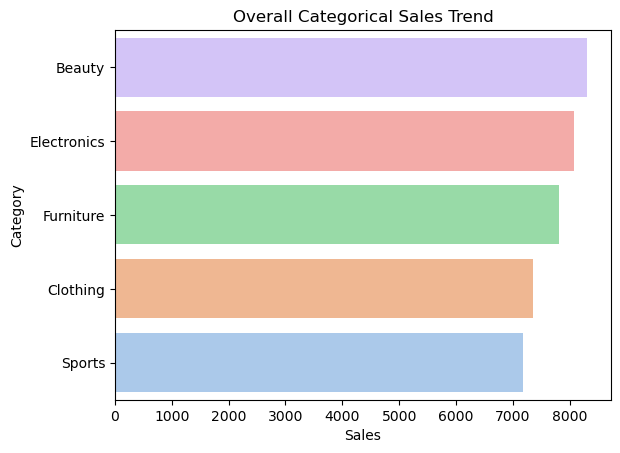

In [11]:
sns.barplot(data= df_DA_Sales_plot, x= 'Sales', y= 'Category', hue= 'Sales', palette= 'pastel')
plt.title("Overall Categorical Sales Trend")
plt.legend().remove()
plt.show()

In [12]:
df_DA_Sales_Monthly = df_DA.pivot_table(index= 'OrderMonth', values= 'Sales', columns= 'Category',aggfunc= 'mean')

In [13]:
df_DA_Sales_Monthly

Category,Beauty,Clothing,Electronics,Furniture,Sports
OrderMonth,,,,,
Apr,6032.720000,8317.500000,10342.076923,7452.600000,7930.312500
Aug,6665.714286,7507.687500,8786.307692,8263.684211,5994.312500
Dec,9390.928571,6727.500000,7817.052632,6370.666667,7704.312500
Feb,8216.500000,9023.550000,9619.055556,5921.565217,7217.750000
Jan,8009.928571,7419.142857,7366.608696,9840.727273,5969.333333
Jul,7815.875000,6376.666667,8164.461538,6810.500000,7912.235294
Jun,8517.090909,6525.684211,5858.117647,8038.916667,7452.181818
Mar,9985.000000,10541.166667,9065.440000,9491.461538,7717.875000
May,7700.692308,8651.352941,7364.807692,8277.352941,9329.157895


In [14]:
df_DA_Sales_Monthly.reset_index(inplace=True)
df_DA_Sales_Monthly['MonNum'] = pd.to_datetime(df_DA_Sales_Monthly['OrderMonth'], format='%b').dt.month
df_DA_Sales_Monthly.sort_values('MonNum',inplace=True)
df_DA_Sales_Monthly

Category,OrderMonth,Beauty,Clothing,Electronics,Furniture,Sports,MonNum
4,Jan,8009.928571,7419.142857,7366.608696,9840.727273,5969.333333,1
3,Feb,8216.500000,9023.550000,9619.055556,5921.565217,7217.750000,2
7,Mar,9985.000000,10541.166667,9065.440000,9491.461538,7717.875000,3
0,Apr,6032.720000,8317.500000,10342.076923,7452.600000,7930.312500,4
8,May,7700.692308,8651.352941,7364.807692,8277.352941,9329.157895,5
6,Jun,8517.090909,6525.684211,5858.117647,8038.916667,7452.181818,6
5,Jul,7815.875000,6376.666667,8164.461538,6810.500000,7912.235294,7
1,Aug,6665.714286,7507.687500,8786.307692,8263.684211,5994.312500,8
11,Sep,8274.947368,5169.473684,8178.705882,8384.166667,6194.642857,9
10,Oct,9414.058824,5248.812500,9117.076923,8431.916667,6195.421053,10


In [15]:
df_DA_Sales_Monthly.set_index('OrderMonth',inplace=True)
df_DA_Sales_Monthly.drop(columns= 'MonNum',inplace=True)
df_DA_Sales_Monthly

Category,Beauty,Clothing,Electronics,Furniture,Sports
OrderMonth,,,,,
Jan,8009.928571,7419.142857,7366.608696,9840.727273,5969.333333
Feb,8216.500000,9023.550000,9619.055556,5921.565217,7217.750000
Mar,9985.000000,10541.166667,9065.440000,9491.461538,7717.875000
Apr,6032.720000,8317.500000,10342.076923,7452.600000,7930.312500
May,7700.692308,8651.352941,7364.807692,8277.352941,9329.157895
Jun,8517.090909,6525.684211,5858.117647,8038.916667,7452.181818
Jul,7815.875000,6376.666667,8164.461538,6810.500000,7912.235294
Aug,6665.714286,7507.687500,8786.307692,8263.684211,5994.312500
Sep,8274.947368,5169.473684,8178.705882,8384.166667,6194.642857


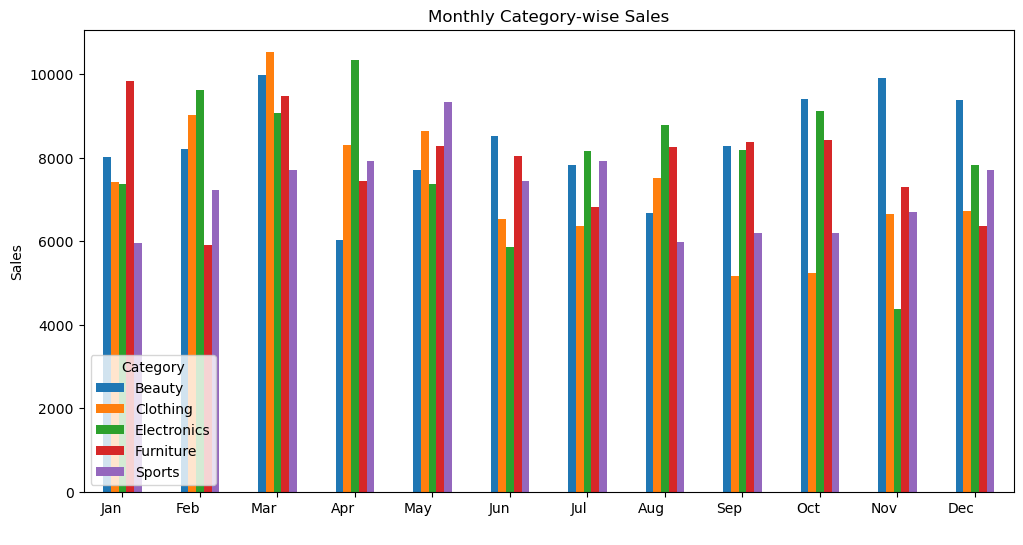

In [16]:
df_DA_Sales_Monthly.plot(kind='bar', figsize=(12,6))
plt.title("Monthly Category-wise Sales")
plt.xlabel(" ")
plt.xticks(rotation= 360, ha='right')
plt.ylabel("Sales")
plt.legend(loc= 'lower left', title="Category")
plt.show()


# Insights:

1)Highest Monthly and Categorical Sales

In [17]:
print(df_DA_Sales_Monthly.max(),df_DA_Sales_Monthly.idxmax())

Category
Beauty          9985.000000
Clothing       10541.166667
Electronics    10342.076923
Furniture       9840.727273
Sports          9329.157895
dtype: float64 Category
Beauty         Mar
Clothing       Mar
Electronics    Apr
Furniture      Jan
Sports         May
dtype: object


## 2)Identify best-selling items and high-revenue periods [weekly].


In [18]:
df_DA_Sales_Weekly = df_DA.pivot_table(index= 'OrderDay', values= 'Sales', columns= 'Category',aggfunc= 'mean')
df_DA_Sales_Weekly

Category,Beauty,Clothing,Electronics,Furniture,Sports
OrderDay,,,,,
Friday,10410.000000,4582.458333,9579.250000,7686.259259,6819.176471
Monday,7205.269231,7435.942857,8612.757576,9546.500000,7890.909091
Saturday,7686.189189,8036.187500,7635.289474,8037.580645,8637.807692
Sunday,8683.950000,7843.777778,7563.214286,6878.642857,7163.064516
Thursday,8978.138889,7684.025641,7182.058824,8566.346154,6589.173913
Tuesday,7977.307692,7551.933333,7760.083333,6731.703704,7616.620690
Wednesday,7380.357143,7763.500000,8735.500000,7404.840000,4572.947368


In [19]:
df_DA_Sales_Weekly.reset_index(inplace=True)
df_DA_Sales_Weekly

Category,OrderDay,Beauty,Clothing,Electronics,Furniture,Sports
0,Friday,10410.000000,4582.458333,9579.250000,7686.259259,6819.176471
1,Monday,7205.269231,7435.942857,8612.757576,9546.500000,7890.909091
2,Saturday,7686.189189,8036.187500,7635.289474,8037.580645,8637.807692
3,Sunday,8683.950000,7843.777778,7563.214286,6878.642857,7163.064516
4,Thursday,8978.138889,7684.025641,7182.058824,8566.346154,6589.173913
5,Tuesday,7977.307692,7551.933333,7760.083333,6731.703704,7616.620690
6,Wednesday,7380.357143,7763.500000,8735.500000,7404.840000,4572.947368


In [20]:
# Define mapping (Monday = 1)
day_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply mapping
df_DA_Sales_Weekly['DayNum'] = df_DA_Sales_Weekly['OrderDay'].map(day_map)

df_DA_Sales_Weekly.set_index('OrderDay',inplace=True)

# Optional: sort by day number
df_DA_Sales_Weekly.sort_values('DayNum', inplace=True)

# Display the result
df_DA_Sales_Weekly


Category,Beauty,Clothing,Electronics,Furniture,Sports,DayNum
OrderDay,,,,,,
Monday,7205.269231,7435.942857,8612.757576,9546.500000,7890.909091,1
Tuesday,7977.307692,7551.933333,7760.083333,6731.703704,7616.620690,2
Wednesday,7380.357143,7763.500000,8735.500000,7404.840000,4572.947368,3
Thursday,8978.138889,7684.025641,7182.058824,8566.346154,6589.173913,4
Friday,10410.000000,4582.458333,9579.250000,7686.259259,6819.176471,5
Saturday,7686.189189,8036.187500,7635.289474,8037.580645,8637.807692,6
Sunday,8683.950000,7843.777778,7563.214286,6878.642857,7163.064516,7


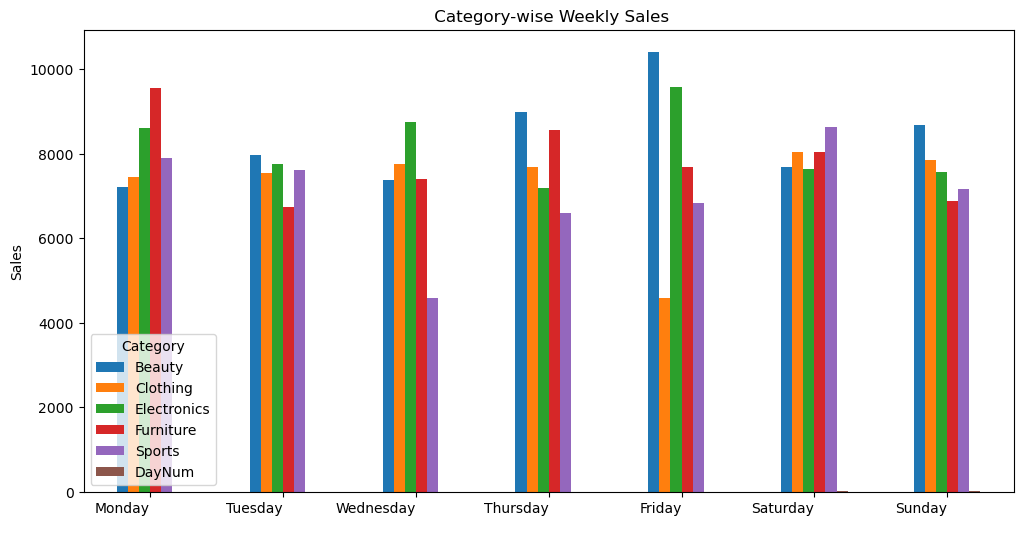

In [21]:
df_DA_Sales_Weekly.plot(kind='bar', figsize=(12,6))
plt.title(" Category-wise Weekly Sales")
plt.xlabel(" ")
plt.xticks(rotation= 360, ha='right')
plt.ylabel("Sales")
plt.legend(loc= 'lower left', title="Category")
plt.show()


# Insights:

Highest Weekly sales for Each Category

In [22]:
df_DA_Sales_Weekly.idxmax()

Category
Beauty           Friday
Clothing       Saturday
Electronics      Friday
Furniture        Monday
Sports         Saturday
DayNum           Sunday
dtype: object

## 3)Analyze payment behavior with sales.

In [31]:
df_DA_Payment = df_DA.pivot_table(index= 'PaymentType', values= 'Sales' ,aggfunc= 'mean')
df_DA_Payment

,Sales
PaymentType,
Cash,8183.636816
Credit Card,8027.154229
Debit Card,7610.228426
Net Banking,7187.427835
UPI,7685.975845


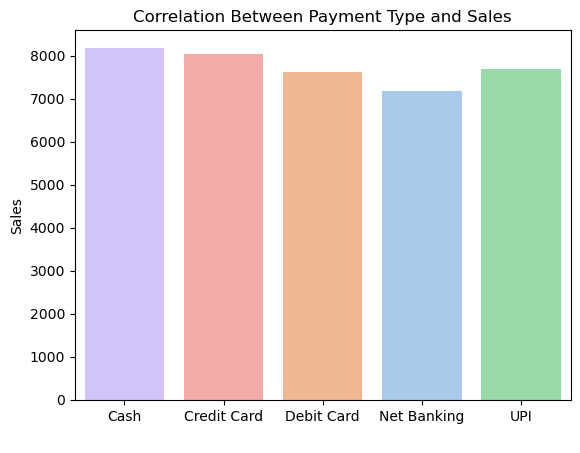

In [32]:
sns.barplot(data= df_DA_Payment, x= 'PaymentType', y= 'Sales', hue= 'Sales',palette= 'pastel')
plt.title("Correlation Between Payment Type and Sales")
plt.legend().remove()
plt.xlabel(" ")
plt.ylabel("Sales")
plt.show()

# Insights:

Highest Payment Type with the Sales it has generated

In [36]:
print(df_DA_Payment.max(),df_DA_Payment.idxmax())

Sales    8183.636816
dtype: float64 Sales    Cash
dtype: object


## 4)Which location yeilds more sales?

In [38]:
df_DA_Location = df_DA.pivot_table(index= 'City', values= 'Sales', aggfunc= 'mean')
df_DA_Location.sort_values(by= 'Sales', ascending=False)

,Sales
City,
Bengaluru,8467.691781
Mumbai,8298.741935
Chennai,7953.772727
Pune,7733.070423
Kolkata,7573.802920
Hyderabad,7131.884058
Delhi,7003.660000


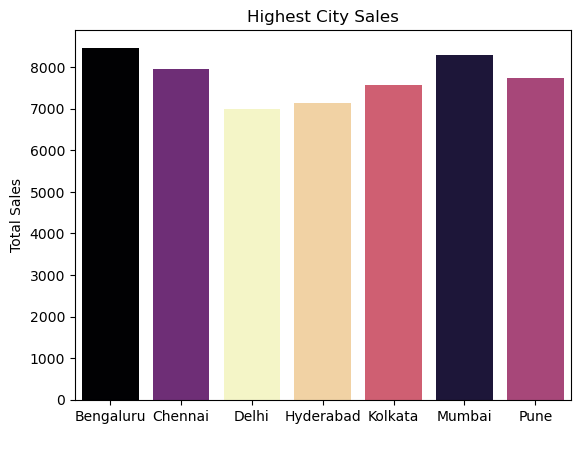

In [46]:
sns.barplot(data= df_DA_Location, x= 'City', y= 'Sales', hue= 'Sales' ,palette= 'magma_r')
plt.title("Highest City Sales")
plt.xlabel(" ")
plt.legend().remove()
plt.ylabel("Total Sales")
plt.show()

# Insights:

Highest city with sales

In [48]:
print(df_DA_Location.max(),df_DA_Location.idxmax())

Sales    8467.691781
dtype: float64 Sales    Bengaluru
dtype: object


## 5)Price, Sales Correlation & Quantity, Price Correlation.

In [75]:
df_DA_Price = df_DA[['Price','Sales']]
df_DA_Price

,Price,Sales
0,4154.0,8308.0
1,2151.0,8604.0
2,830.0,4150.0
3,1367.0,2734.0
4,1901.0,5703.0
...,...,...
995,2216.0,8864.0
996,1979.0,7916.0
997,1443.0,7215.0
998,1525.0,4575.0


In [77]:
df_DA_Price_Corr = df_DA_Price.corr()
df_DA_Price_Corr

,Price,Sales
Price,1.000000,0.719245
Sales,0.719245,1.000000


- This shows very high correlation, meaning that higher-priced products generate proportionally higher total sales revenue.This is not a usual behaviour in buisness.The pattern suggests that either the quantity sold remains stable across price ranges, or that premium-priced items are contributing significantly to overall revenue.

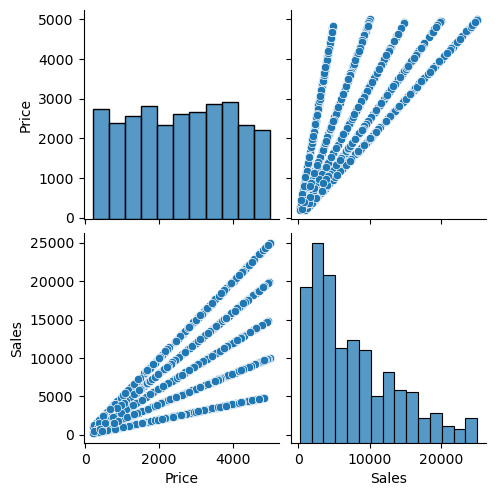

In [78]:
sns.pairplot(data=df_DA_Price)
plt.show()

In [79]:
df_DA_Quantity = df_DA[['Price','Quantity']]

In [80]:
df_DA_Quantity

,Price,Quantity
0,4154.0,2
1,2151.0,4
2,830.0,5
3,1367.0,2
4,1901.0,3
...,...,...
995,2216.0,4
996,1979.0,4
997,1443.0,5
998,1525.0,3


In [82]:
df_DA_Quantity_Corr = df_DA_Quantity.corr()
df_DA_Quantity_Corr

,Price,Quantity
Price,1.000000,0.058757
Quantity,0.058757,1.000000


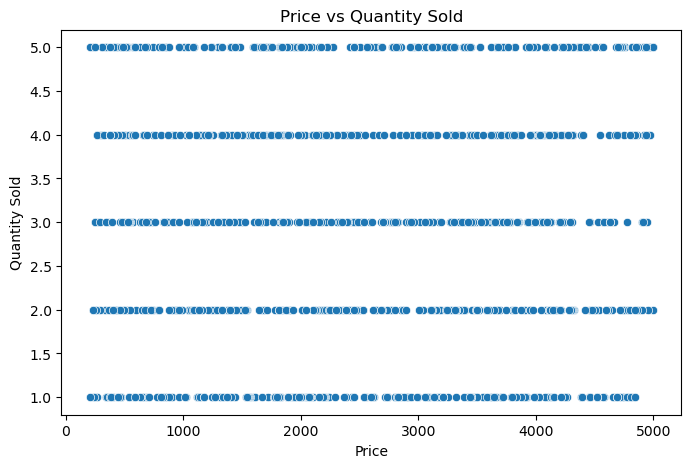

In [83]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Price', y='Quantity')
plt.title("Price vs Quantity Sold")
plt.xlabel("Price")
plt.ylabel("Quantity Sold")
plt.show()

- This shows poor correlation, meaning Price has virtually no effect on Quantity sold in our dataset. People buy roughly the same number of units 
regardless of price (inelastic demand). Total Sales grows with Price purely mathematically, not because higher prices drive more purchases.
The scattered cloud of points, with no clear upward or downward trend — confirming almost no correlation.